In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

## 1. KOSPI 5개년 ROE 지수 확인

In [4]:
df_kospi = pd.read_excel("C:\\Users\\easya\\Workspace\\HK_Project\\data\\KOSPIROE5years.xlsx")
df_kospi.head()

,종목명,2017,2018,2019,2020,2021
0,에스디바이오센서,-4.6,3.8,NaN,139.7,86.6
1,태영건설,10.1,19.2,8.4,62.0,12.6
2,크래프톤,NaN,NaN,99.2,61.9,23.9
3,삼성출판사,3.9,0.4,5.5,45.6,1.4
4,솔루엠,-39.7,-50.5,87.0,43.3,13.7


In [5]:
# 결측치 확인
df_kospi.isna().sum()

종목명     0
2017    8
2018    3
2019    2
2020    0
2021    1
dtype: int64

In [6]:
# 빈칸 nan값으로 변환 후 제거
df_kospi.replace('', np.nan)
df_kospi.dropna(inplace=True)
df_kospi.head()

,종목명,2017,2018,2019,2020,2021
1,태영건설,10.1,19.2,8.4,62.0,12.6
3,삼성출판사,3.9,0.4,5.5,45.6,1.4
4,솔루엠,-39.7,-50.5,87.0,43.3,13.7
5,시디즈,1.4,17.1,27.3,42.9,29.7
6,신풍제지,2.2,18.0,32.3,38.8,-2.0


In [7]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1 to 87
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     78 non-null     object 
 1   2017    78 non-null     float64
 2   2018    78 non-null     float64
 3   2019    78 non-null     float64
 4   2020    78 non-null     float64
 5   2021    78 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.3+ KB


In [8]:
# ROE 11이상 
df_kospi_ROE_11_upper = df_kospi[(df_kospi[2017] >= 11) & (df_kospi[2018] >= 11) & (df_kospi[2019] >= 11) & (df_kospi[2020] >= 11) & (df_kospi[2021] >= 11)]
df_kospi_ROE_11_upper.head()

,종목명,2017,2018,2019,2020,2021
11,코웨이,30.1,33.8,30.7,31.5,30.6
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8
20,효성ITX,16.5,13.7,21.8,25.2,22.6
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5
26,DL건설,22.2,18.7,23.0,23.7,20.0


In [9]:
# '평균' 열 추가
df_kospi_ROE_11_upper["average"] = df_kospi_ROE_11_upper.mean(axis=1)
df_kospi_ROE_11_upper.head()

,종목명,2017,2018,2019,2020,2021,average
11,코웨이,30.1,33.8,30.7,31.5,30.6,31.34
15,에이플러스에셋,24.9,24.7,22.9,29.7,16.8,23.80
20,효성ITX,16.5,13.7,21.8,25.2,22.6,19.96
23,한솔케미칼,18.0,20.1,20.9,24.5,27.5,22.20
26,DL건설,22.2,18.7,23.0,23.7,20.0,21.52


- 시각화

In [10]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list[:5]

['STIXSizeFourSym',
 'STIXSizeOneSym',
 'cmsy10',
 'DejaVu Serif Display',
 'STIXNonUnicode']

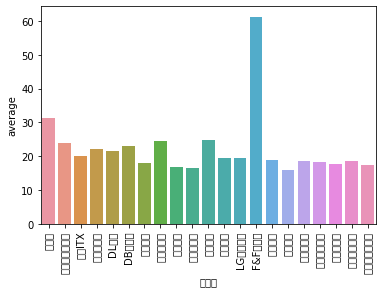

In [11]:
sns.barplot(
    data = df_kospi_ROE_11_upper,
    x = "종목명",
    y = "average"
)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 7
plt.xticks(rotation=90)
plt.show()

## 2. df_code와 병합

In [13]:
df_code = pd.read_excel("C:\\Users\\easya\\Workspace\\HK_Project\\data\\KOSPI데이터0305.xlsx")
df_code.head(3)

,종목명,종목코드,시가총액,매출액,현금흐름,PER,ROE,ROA,PBR,PSR,PCR,자산총계,부채총계,자본총계,주당순이익
0,삼성전자,5930,4351971,2796048,651054.5,12.62,13.92,9.92,1.67,1.556472,6.684496,4266212,1217212,3049000,5777
1,SK하이닉스,660,939123,319004,123145.7,11.66,9.53,6.98,1.51,2.943922,7.626113,711739,192648,519091,11061
2,NAVER,35420,533980,53041,14472.1,3.22,15.22,5.77,2.05,10.067306,36.897202,170142,87591,82551,101024


In [14]:
df_code = df_code[["종목명", "종목코드"]]
df_code

,종목명,종목코드
0,삼성전자,5930
1,SK하이닉스,660
2,NAVER,35420
3,카카오,35720
4,LG화학,51910
...,...,...
782,체시스,33250
783,코아스,71950
784,다이나믹디자인,145210
785,부산주공,5030


In [ ]:
df_code.info()

In [15]:
# data type 확인
df_code = df_code.astype({"종목코드":"string"})
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     787 non-null    object
 1   종목코드    787 non-null    string
dtypes: object(1), string(1)
memory usage: 12.4+ KB


- 종목코드 형식에 맞추어 변경 : 6자리

In [16]:
for i in range(7):
    df_code["종목코드"] = df_code["종목코드"].str.zfill(i)
df_code.head()

,종목명,종목코드
0,삼성전자,005930
1,SK하이닉스,000660
2,NAVER,035420
3,카카오,035720
4,LG화학,051910


- df_kosdaq_ROE_11_upper 데이터 프레임과 df_code 병합

In [17]:
df_code_merge = pd.merge(df_code, df_kospi_ROE_11_upper, how='outer', on='종목명')
df_code_merge

,종목명,종목코드,2017,2018,2019,2020,2021,average
0,삼성전자,005930,NaN,NaN,NaN,NaN,NaN,NaN
1,SK하이닉스,000660,NaN,NaN,NaN,NaN,NaN,NaN
2,NAVER,035420,NaN,NaN,NaN,NaN,NaN,NaN
3,카카오,035720,NaN,NaN,NaN,NaN,NaN,NaN
4,LG화학,051910,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
782,체시스,033250,NaN,NaN,NaN,NaN,NaN,NaN
783,코아스,071950,NaN,NaN,NaN,NaN,NaN,NaN
784,다이나믹디자인,145210,NaN,NaN,NaN,NaN,NaN,NaN
785,부산주공,005030,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# NaN 값 삭제
df_code_merge.dropna(inplace=True)
df_code_merge.head(5)

,종목명,종목코드,2017,2018,2019,2020,2021,average
21,LG생활건강,051900,21.9,21.0,20.3,17.9,16.7,19.56
36,엔씨소프트,036570,19.1,16.4,14.7,20.8,11.7,16.54
62,코웨이,021240,30.1,33.8,30.7,31.5,30.6,31.34
64,금호석유,011780,12.3,23.5,11.8,20.2,55.9,24.74
66,메리츠금융지주,138040,19.4,13.9,15.3,16.1,22.5,17.44


In [19]:
df_ROE_11_upper = df_code_merge.copy()

In [20]:
# excel 파일로 변환
df_ROE_11_upper.to_excel("kospi_ROE_11_upper.xlsx")

## 중간 진행과정 정리
1. ROE 15 이상 기업 추출
2. ROE 5개년 꾸준히 11이상 나온 안정성 있는 기업 추출
3. 2단계에서 추출된 종목의 갯수로 보아, 각 종목에 해당하는 산업은 개별적으로 검색을 통해 기재하기로 함

In [21]:
df = pd.read_excel('C:\\Users\\easya\\Workspace\\HK_Project\\data\\kospi_ROE_11_upper.xlsx')
df.head(2)

,Unnamed: 0,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
0,21,LG생활건강,51900,21.9,21.0,20.3,17.9,16.7,19.56,화학,화장품
1,36,엔씨소프트,36570,19.1,16.4,14.7,20.8,11.7,16.54,서비스업,게임엔터테인먼트


In [22]:
# 필요없는 컬럼 제거
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
0,LG생활건강,51900,21.9,21.0,20.3,17.9,16.7,19.56,화학,화장품
1,엔씨소프트,36570,19.1,16.4,14.7,20.8,11.7,16.54,서비스업,게임엔터테인먼트
2,코웨이,21240,30.1,33.8,30.7,31.5,30.6,31.34,서비스업,가정용기기와용품
3,금호석유,11780,12.3,23.5,11.8,20.2,55.9,24.74,화학,화학
4,메리츠금융지주,138040,19.4,13.9,15.3,16.1,22.5,17.44,기타금융업,증권


In [23]:
# data type 변경
df = df.astype({"종목코드":"string"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종목명      21 non-null     object 
 1   종목코드     21 non-null     string 
 2   2017     21 non-null     float64
 3   2018     21 non-null     float64
 4   2019     21 non-null     float64
 5   2020     21 non-null     float64
 6   2021     21 non-null     float64
 7   average  21 non-null     float64
 8   산업       21 non-null     object 
 9   WICS     19 non-null     object 
dtypes: float64(6), object(3), string(1)
memory usage: 1.8+ KB


- 종목코드가 6자리에 해당이 (6 - 기재된 코드의 길이)만큼 앞자리에 0을 추가

In [24]:
for i in range(7):
    df["종목코드"] = df["종목코드"].str.zfill(i)
df.head(3)

,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
0,LG생활건강,051900,21.9,21.0,20.3,17.9,16.7,19.56,화학,화장품
1,엔씨소프트,036570,19.1,16.4,14.7,20.8,11.7,16.54,서비스업,게임엔터테인먼트
2,코웨이,021240,30.1,33.8,30.7,31.5,30.6,31.34,서비스업,가정용기기와용품


In [25]:
df1 = df.copy()

In [26]:
# '산업' 종류 확인
df1["산업"].unique()

array(['화학', '서비스업', '기타금융업', '보험업', '전기전자', '음식료품', '건설업'], dtype=object)

In [27]:
# '산업'의 종류별 갯수 확인
df1["산업"].value_counts()

서비스업     6
화학       5
기타금융업    5
건설업      2
보험업      1
전기전자     1
음식료품     1
Name: 산업, dtype: int64